# Table of Contents
 <p><div class="lev2"><a href="#Submitted-to-the-map"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Submitted to the map</a></div><div class="lev2"><a href="#Submitted-the-assignment"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Submitted the assignment</a></div><div class="lev2"><a href="#Exit-survey"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Exit survey</a></div><div class="lev2"><a href="#Assignment-survey"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Assignment survey</a></div><div class="lev2"><a href="#Before-and-after-analysis"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Before and after analysis</a></div>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

## Submitted to the map

In [ ]:
responses = pd.read_csv('./data/responsemap/responses.csv')
responses = responses[responses[' deleted'] != 1]

assignment1 = []
assignment1.append(responses.ix[responses[' map_id'] == 30, 
                                ['user_id', ' description', ' create_time', ' update_time']])
assignment1.append(responses.ix[responses[' map_id'] == 31, 
                                ['user_id', ' description', ' create_time', ' update_time']])
assignment1 = pd.concat(assignment1, axis=0)
assignment1.dropna(inplace=True)

assignment1['length'] = assignment1[' description'].str.split(' ').apply(len)
assignment1.sort(['user_id', 'length'], inplace=True)
assignment1.drop_duplicates(subset='user_id', keep='last', inplace=True)
assignment1.reset_index(drop=True, inplace=True)

In [ ]:
assignment2 = []
assignment2.append(responses.ix[responses[' map_id'] == 34, 
                                ['user_id', ' description', ' create_time', ' update_time']])
assignment2.append(responses.ix[responses[' map_id'] == 35, 
                                ['user_id', ' description', ' create_time', ' update_time']])
assignment2 = pd.concat(assignment2, axis=0)
assignment2.dropna(inplace=True)

assignment2['length'] = assignment2[' description'].str.split(' ').apply(len)
#assignment2[assignment2.length < 50]
assignment2.sort(['user_id', 'length'], inplace=True)
assignment2.drop_duplicates(subset='user_id', keep='last', inplace=True)
assignment2.reset_index(drop=True, inplace=True)

In [ ]:
# Assign groups
anon_id = pd.read_excel('./data/anon id.xlsx', 'data')
users = pd.read_csv('./data/users.csv', header=None, names=['map_id', 'anon_id'])
assignment1 = assignment1.merge(users, left_on='user_id', right_on='map_id')
assignment1 = assignment1.merge(anon_id, left_on='anon_id', right_on='Course Specific Anonymized User ID')
assignment2 = assignment2.merge(users, left_on='user_id', right_on='map_id')
assignment2 = assignment2.merge(anon_id, left_on='anon_id', right_on='Course Specific Anonymized User ID')
assignment1.groupby('cohort (main)').size()
assignment2.groupby('cohort (main)').size()
assignment1[assignment1.length>50].groupby('cohort (main)').size()
assignment2[assignment2.length>50].groupby('cohort (main)').size()

** All together, 131 submitted for asign1, 161 submitted for assign2 (other groups included) **

|             | Group A | Group B |
|-------------|---------|---------|
| Assignment1 | 57      | 57      |
| Assignment2 | 75      | 72      |

** After deleted submissions less than 50 words **

|             | Group A | Group B |
|-------------|---------|---------|
| Assignment1 | 51      | 48      |
| Assignment2 | 67      | 67      |

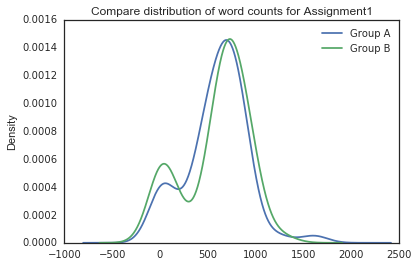

In [1252]:
assignment1.ix[(assignment1['cohort (main)'] == 'Group A'), 'length'].plot(kind='kde', label='Group A')
assignment1.ix[(assignment1['cohort (main)'] == 'Group B'), 'length'].plot(kind='kde', label='Group B')
plt.title('Compare distribution of word counts for Assignment1')
plt.legend()

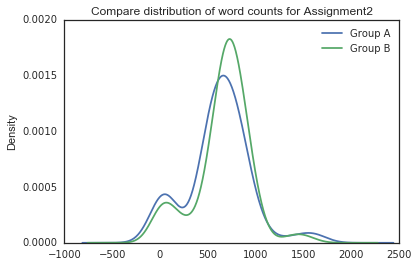

In [1251]:
assignment2.ix[(assignment2['cohort (main)'] == 'Group A'), 'length'].plot(kind='kde', label='Group A')
assignment2.ix[(assignment2['cohort (main)'] == 'Group B'), 'length'].plot(kind='kde', label='Group B')
plt.title('Compare distribution of word counts for Assignment2')
plt.legend()

## Submitted the assignment

In [124]:
query = """
Select student_id
From [UBCx__Climate101x__3T2015.studentmodule]
Where module_id Like '%9dd601c6986a4a51b72537be36eda262' 
Or module_id Like '%c657186545d04bb7b41f3fba15fc5fed'"""
assign1 = pd.io.gbq.read_gbq(query, project_id='ubcxdata', verbose=False)
#assign1 = assign1[assign1.state.apply(lambda x: 'saved_response' in x)][['student_id']]

query = """
Select student_id
From [UBCx__Climate101x__3T2015.studentmodule]
Where module_id Like '%21be5a1d3acd4c48818bf0fd121d0792' 
Or module_id Like '%7362fffd2b27439baf82e8232d731fc2'"""
assign2 = pd.io.gbq.read_gbq(query, project_id='ubcxdata', verbose=False)
#assign2 = assign2[assign2.state.apply(lambda x: 'saved_response' in x)][['student_id']]

In [ ]:
anon_id = pd.read_excel('data/anon id.xlsx', 'data')
assign1 = pd.merge(assign1, anon_id, left_on='student_id', right_on='User ID')[['User ID', 'cohort (main)']]
assign2 = pd.merge(assign2, anon_id, left_on='student_id', right_on='User ID')[['User ID', 'cohort (main)']]

groupA = pd.concat([assign1[assign1['cohort (main)'] == 'Group A'], 
                    assign2[assign2['cohort (main)'] == 'Group A']]).drop_duplicates().reset_index(drop=True)
groupB = pd.concat([assign1[assign1['cohort (main)'] == 'Group B'], 
                    assign2[assign2['cohort (main)'] == 'Group B']]).drop_duplicates().reset_index(drop=True)
groups = pd.concat([groupA, groupB])#.set_index('User ID', inplace=True)
groups.set_index('User ID', inplace=True)
groups.rename(columns={'cohort (main)': 'Group'}, inplace=True)
groups.head()

- Groups are obtained by joining those who submitted the assignment at least once and anion_id 
- All together, 217 submitted for assign1, 184 submitted for assign2 (other groups included) 

|             | Group A | Group B |
|-------------|---------|---------|
| Assignment1 | 101     | 93      |
| Assignment2 | 81      | 88      |

## Exit survey 
** those who submitted the assignments at least once **

In [ ]:
survey = pd.io.gbq.read_gbq("Select * From [UBCx__Climate101x__3T2015.exit_survey_mapped]", 
                            project_id='ubcxdata', verbose=False)
survey.set_index('user_id', inplace=True)
# survey['s_Q2_2_1'].notnull().sum()
survey_grouped = groups.join(survey, how='inner')
# survey_grouped.shape
# survey_grouped['s_Q2_2_1'].notnull().sum()

**  Now that the course is over, how informed do you feel about climate change issues... **
- Globally
- in your local area or region

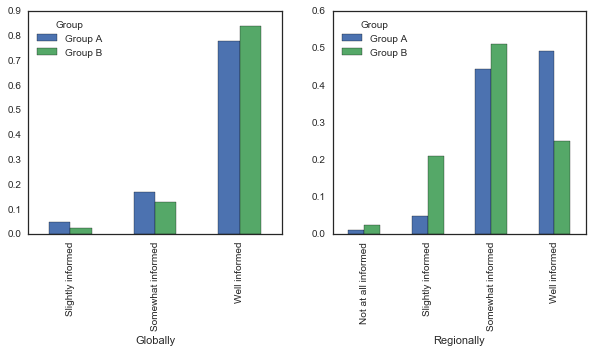

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
survey_grouped.groupby('Group')['s_Q1_1_1'].value_counts(normalize=True).unstack('Group').plot(kind='bar', ax=axes[0])
survey_grouped.groupby('Group')['s_Q1_1_2'].value_counts(normalize=True, sort=False).unstack('Group').plot(kind='bar', ax=axes[1])
axes[0].set_xlabel('Globally')
axes[1].set_xlabel('Regionally')

** Impact on overall satsifaction: Would you recommend to a friend? **

- Out of 291 who submitted the survey, 202 (69.4%) recommended the course. 
- Out of 165 who both finished the survey and submitted the assignments at least once, 120 (72.7%) recommended the course.

In [143]:
def recommend(df):
    return df['s_Q2_2_1'].notnull().sum() / float(len(df))
survey_grouped.groupby('Group').apply(recommend)

Group
Group A    0.764045
Group B    0.684211
dtype: float64

## Assignment survey 
** those who submitted the corresponding assignment **

In [170]:
def assign_survey(filepath, group, assign_group):
    # './data/assignment1a.csv'
    assign = pd.read_csv(filepath, skiprows=[1])
    assign.drop('Unnamed: 29', axis=1, inplace=True)
    ## map ID
    assign_grouped = assign.merge(anon_id, left_on='uid', right_on='Anonymized User ID')
    survey_num = (assign_grouped['cohort (main)'] == group).sum()
    print survey_num
    assign_submitted = assign_grouped.ix[:, :-2].merge(assign_group, how='inner', on='User ID')
    assign_submitted = assign_submitted[assign_submitted['cohort (main)'] == group]
    print len(assign_submitted)
    
    return assign_submitted

In [ ]:
assign1a = assign_survey('data/assignment1a.csv', 'Group A', assign1)
assign1b = assign_survey('data/assignment1b.csv', 'Group B', assign1)
assign2a = assign_survey('data/assignment2a.csv', 'Group A', assign2)
assign2b = assign_survey('data/assignment2b.csv', 'Group B', assign2)

- Those who submitted the assignment surveys 

|             | Group A | Group B |
|-------------|---------|---------|
| Assignment1 | 109     | 103     |
| Assignment2 | 63      | 71      |

- Those who also submitted the corresponding assignment

|             | Group A | Group B |
|-------------|---------|---------|
| Assignment1 | 100     | 87      |
| Assignment2 | 59      | 63      |

** Analyze survey of assignment1 **

In [192]:
assign = pd.concat([assign1a, assign1b])

In [193]:
assign.rename(columns={'cohort (main)': 'Group'}, inplace=True)

** Q1 How much do you agree with the following statements? Following the assignment... **
1. I better understand global impacts of climate change
2. I am more aware of the impact of climate change on my region
3. I am more comfortable evaluating resources related to climate change
4. I am more comfortable communicating information about climate change to others

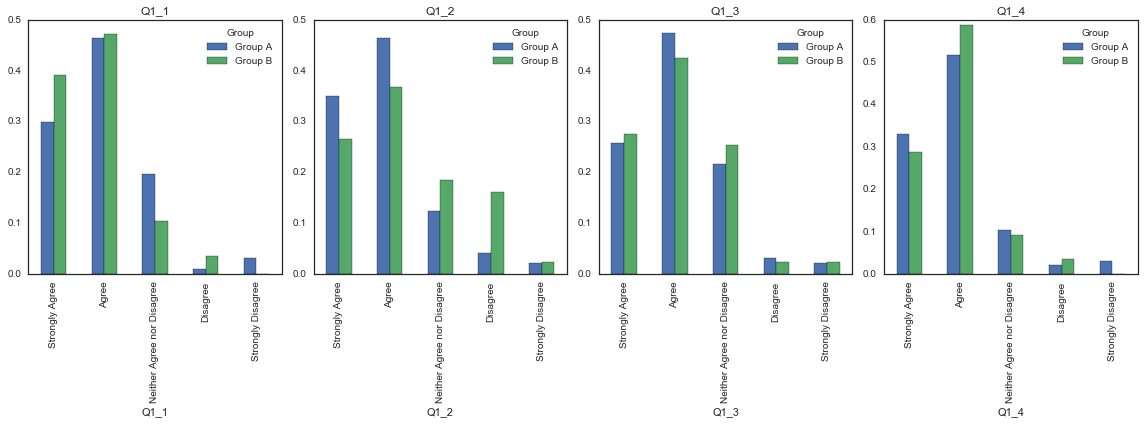

In [194]:
ranks = ['Strongly Agree', 'Agree', 'Neither Agree nor Disagree', 'Disagree', 'Strongly Disagree']
Q1s = ['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4']
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(16, 6))
for i, ax in enumerate(axes.flat):
    assign.groupby('Group')[Q1s[i]].value_counts(normalize=True).unstack('Group').ix[ranks, :].plot(kind='bar', ax=ax)
    ax.set_title(Q1s[i])
fig.tight_layout()
plt.show()

** Q2 The assignment was **
1. Too easy:Too diffcult
2. Interesting:Boring
3. Beneficial for me:Unnecessary
4. Clear:Vague
5. Authentic:Artificial

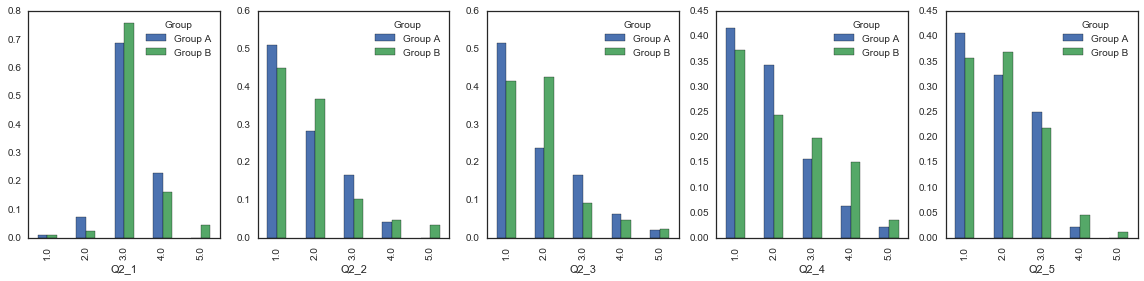

In [195]:
Q2s = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5']
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, figsize=(16, 4))
for i, ax in enumerate(axes.flat):
    assign.groupby('Group')[Q2s[i]].value_counts(normalize=True).unstack('Group').plot(kind='bar', ax=ax)
fig.tight_layout()
plt.show()

** Q3 I used the map to look at submissions of other learners: Number of entries **
1. From my region
2. From other region of interest

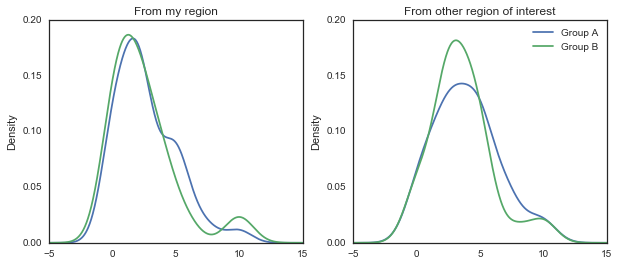

In [196]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10, 4))
for label, df in assign.groupby('Group'):
    df.Q3_1.dropna().plot(kind="kde", label=label, ax=axes[0])
    #plt.show()
plt.legend()
axes[0].set_title('From my region')
for label, df in assign.groupby('Group'):
    df.Q3_2.dropna().plot(kind="kde", label=label, ax=axes[1])
    #plt.show()
plt.legend()
axes[1].set_title('From other region of interest')

** Q4 Reading the contributions of my peers was... **
1. Interesting:Boring
2. Beneficial for me:Unnecessary

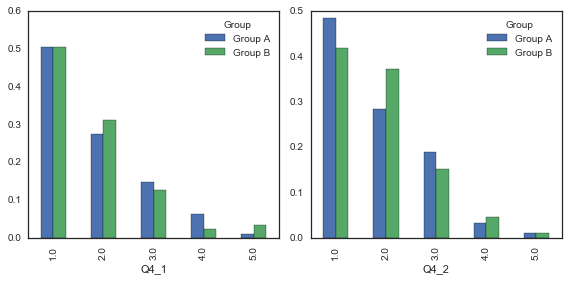

In [197]:
Q4s = ['Q4_1', 'Q4_2']
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    assign.groupby('Group')[Q4s[i]].value_counts(normalize=True).unstack('Group').plot(kind='bar', ax=ax)
fig.tight_layout()
plt.show()

** Approximately how many minutes did you spend on the last activity? **

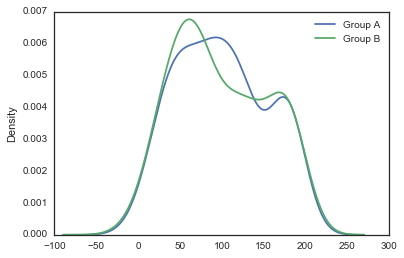

In [198]:
for label, df in assign.groupby('Group'):

    df.Q5_1.dropna().plot(kind="kde", label=label)
    #plt.show()
plt.legend()

In [216]:
print 'mean by group:'
assign.groupby('Group').Q5_1.mean()

mean by group:


Group
Group A    99.905263
Group B    98.621951
Name: Q5_1, dtype: float64

## Before and after analysis
** the date of submitting the first assignment **

In [3]:
# query and aggregate person_course_day for each student before they submitted assignment 1
before_query = """SELECT user_id, Count(date) As ndays_act, Sum(nproblems_attempted) As nproblems_attempted, 
            sum(nvideos_viewed) As nvideos_viewed, sum(videowatch_sec) As nvideowatch_sec, Sum(sum_dt) As sum_dt
            FROM 
            (SELECT uic.user_id As user_id, pc.date As date, Date(sm.modified) As assign1_date, 
            pc. nproblems_attempted As nproblems_attempted, pc.nvideos_viewed As nvideos_viewed, 
            pc.nvideos_watched_sec As videowatch_sec, pc.sum_dt/3600 As sum_dt
            FROM [UBCx__Climate101x__3T2015.studentmodule] sm
            Left Join [UBCx__Climate101x__3T2015.user_info_combo] uic
            On sm.student_id = uic.user_id
            Left Join [UBCx__Climate101x__3T2015.person_course_day] pc
            On uic.username = pc.username
            Where module_id Like '%9dd601c6986a4a51b72537be36eda262' 
            Or module_id Like '%c657186545d04bb7b41f3fba15fc5fed')
            Where date < assign1_date
            Group By user_id"""
before = pd.io.gbq.read_gbq(before_query, project_id='ubcxdata', verbose=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11457eb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114c6dc10>]], dtype=object)

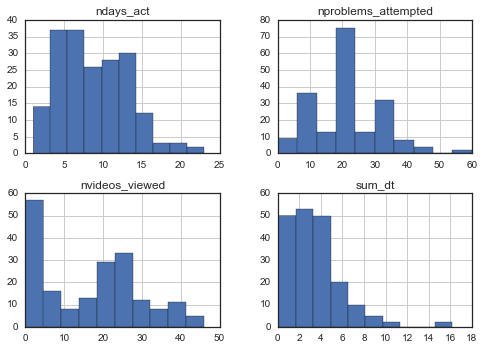

In [4]:
# merge with anon_id to assign groups
anon_id = pd.read_excel('./data/anon id.xlsx', 'data')
before_grouped = pd.merge(before, anon_id[['User ID', 'cohort (main)']], left_on='user_id', right_on='User ID')
before_grouped.rename(columns={'cohort (main)': 'Group'}, inplace=True)
before_grouped = before_grouped[(before_grouped.Group == 'Group A') | (before_grouped.Group == 'Group B')]
cols = ['nproblems_attempted', 'nvideos_viewed', 'sum_dt', 'ndays_act']
before_grouped[cols].hist()

In [5]:
before_grouped.groupby('Group')[cols].describe()

nproblems_attempted  nvideos_viewed      sum_dt   ndays_act
Group                                                                     
Group A count           101.000000      101.000000  101.000000  101.000000
        mean             21.881188       16.504950    3.313772    8.772277
        std              10.721275       13.345879    2.093836    4.232921
        min               0.000000        0.000000    0.101771    1.000000
        25%              12.000000        3.000000    1.644805    6.000000
        50%              23.000000       17.000000    3.079283    8.000000
        75%              25.000000       24.000000    4.466230   12.000000
        max              60.000000       46.000000   10.337196   23.000000
Group B count            91.000000       91.000000   91.000000   91.000000
        mean             22.263736       16.890110    3.617255    8.604396
        std               9.883584       11.715565    2.825550    4.496614
        min               0.000000        0.000000    0.083098    1.000000
        25%              14.500000        5.000000    1.768100    5.000000
        50%              23.000000       19.000000    3.176679    8.000000
        75%              29.500000       24.500000    4.488690   11.000000
        max              46.000000       41.000000   16.161162   21.000000

In [6]:
after_query = """SELECT user_id, Count(date) As ndays_act, Sum(nproblems_attempted) As nproblems_attempted, 
            sum(nvideos_viewed) As nvideos_viewed, sum(videowatch_sec) As nvideowatch_sec, Sum(sum_dt) As sum_dt
            FROM 
            (SELECT uic.user_id As user_id, pc.date As date, Date(sm.modified) As assign1_date, 
            pc. nproblems_attempted As nproblems_attempted, pc.nvideos_viewed As nvideos_viewed, 
            pc.nvideos_watched_sec As videowatch_sec, pc.sum_dt/3600 As sum_dt
            FROM [UBCx__Climate101x__3T2015.studentmodule] sm
            Left Join [UBCx__Climate101x__3T2015.user_info_combo] uic
            On sm.student_id = uic.user_id
            Left Join [UBCx__Climate101x__3T2015.person_course_day] pc
            On uic.username = pc.username
            Where module_id Like '%9dd601c6986a4a51b72537be36eda262' 
            Or module_id Like '%c657186545d04bb7b41f3fba15fc5fed')
            Where date > assign1_date
            Group By user_id"""
after = pd.io.gbq.read_gbq(after_query, project_id='ubcxdata', verbose=False)

In [7]:
after_grouped = pd.merge(after, anon_id[['User ID', 'cohort (main)']], left_on='user_id', right_on='User ID')
after_grouped.rename(columns={'cohort (main)': 'Group'}, inplace=True)
after_grouped = after_grouped[(after_grouped.Group == 'Group A') | (after_grouped.Group == 'Group B')].fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114bb3a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11498f050>]], dtype=object)

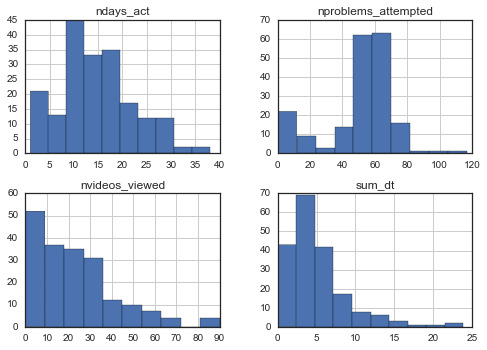

In [8]:
after_grouped[cols].hist()

In [9]:
after_grouped.groupby('Group')[cols].describe()

nproblems_attempted  nvideos_viewed      sum_dt   ndays_act
Group                                                                     
Group A count           100.000000      100.000000  100.000000  100.000000
        mean             52.210000       23.990000    5.184238   15.630000
        std              21.944510       18.703694    3.543571    7.093396
        min               0.000000        0.000000    0.030693    1.000000
        25%              52.750000       11.750000    2.990829   12.000000
        50%              54.000000       21.500000    4.641174   15.000000
        75%              63.000000       33.250000    6.693091   19.250000
        max             117.000000       90.000000   21.802369   32.000000
Group B count            92.000000       92.000000   92.000000   92.000000
        mean             48.695652       20.402174    4.809232   13.782609
        std              21.968879       20.172367    4.474319    8.165629
        min               0.000000        0.000000    0.000000    1.000000
        25%              43.000000        2.000000    2.087003    9.000000
        50%              53.000000       17.000000    3.811118   13.000000
        75%              63.000000       31.000000    5.780112   18.250000
        max             104.000000       86.000000   23.897943   38.000000

In [10]:
before_grouped['period'] = 'before'
after_grouped['period'] = 'after'

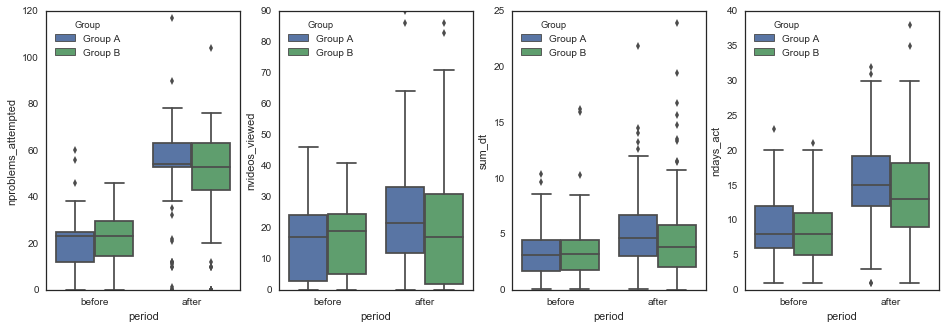

In [31]:
grouped = pd.concat([before_grouped, after_grouped])
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))
for i, ax in enumerate(axes.flat):
    sns.boxplot(x='period', y=cols[i], hue='Group', data=grouped, ax=ax)
    #plt.xticks([0, 1], ['Group A', 'Group B'])
plt.show()

In [24]:
from statsmodels.formula.api import ols

In [46]:
for col in ['nproblems_attempted', 'nvideos_viewed', 'sum_dt', 'ndays_act']:
    df = before_grouped[['user_id', col, 'Group']].merge(after_grouped[['user_id', col, 'Group']], 
                                                                    on=['user_id', 'Group'], how='outer')
    formula = '{0}_y ~ {0}_x * C(Group)'.format(col)
    lm = ols(formula, df)
    fit = lm.fit()
    print col + ':'
    print fit.summary()
    print '\n\n'

nproblems_attempted:
                              OLS Regression Results                             
Dep. Variable:     nproblems_attempted_y   R-squared:                       0.021
Model:                               OLS   Adj. R-squared:                  0.005
Method:                    Least Squares   F-statistic:                     1.315
Date:                   Fri, 26 Aug 2016   Prob (F-statistic):              0.271
Time:                           15:28:42   Log-Likelihood:                -853.06
No. Observations:                    190   AIC:                             1714.
Df Residuals:                        186   BIC:                             1727.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------